In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
import spikeinterface.full as si
from probeinterface import read_probeinterface
from adc_shifts import adc_shifts

ModuleNotFoundError: No module named 'adc_shifts'

In [3]:
# Data loading
num_channels = 384
sampling_frequency = 2500
# see this thread https://community.brain-map.org/t/using-the-raw-data/1898 for gain scaling factor and dtype
gain_recording = 4.69
offset_recording = 0
dtype = np.int16

In [4]:
base_folder = Path.home() / 'RANCZLAB-NAS/data/ONIX/mouse_343/mouse_343_2024-06-13T133909Z'
binary_filename = 'LFP.bin'

In [8]:
recordings = {}
recordings['raw'] = si.read_binary(base_folder / binary_filename, sampling_frequency=sampling_frequency, dtype=dtype, num_channels=num_channels, gain_to_uV=1.0, offset_to_uV=0)
recordings['raw'] = si.scale(recordings['raw'], gain=gain_recording, offset=offset_recording) #scale to uV
recordings['raw']

ScaleRecording: 384 channels - 2.5kHz - 1 segments - 382,506 samples - 153.00s (2.55 minutes) 
                float32 dtype - 560.31 MiB

In [9]:
# perform the phase shift (similar to IBL destriping or `tshift` option in CatGT):
recordings['phase_shift'] = si.phase_shift(recordings['raw'], inter_sample_shift=adc_shifts()[0])

NameError: name 'adc_shifts' is not defined

In [5]:
# Other
backend = 'ipywidgets'

pipeline_info_dict.update({'backend': backend})

In [10]:
# # detect noisy, dead, and out-of-brain channels
# bad_channel_ids, channel_labels = si.detect_bad_channels(recordings['phase_shift'])
# recordings['good_channels'] = recordings['phase_shift'].remove_channels(remove_channel_ids=bad_channel_ids)

# pipeline_info_dict.update({'channel_labels': channel_labels, 'bad_channel_ids': bad_channel_ids})

In [12]:
# print('Channels removed:', {k: channel_labels[k] for k in bad_channel_ids})

In [13]:
recordings['highpass'] = si.highpass_filter(recordings['phase_shift'], freq_min=highpass_frequency)

In [14]:
# subtract the median across all channels
recordings['common_reference'] = si.common_reference(recordings['highpass'], operator="median", reference="global")

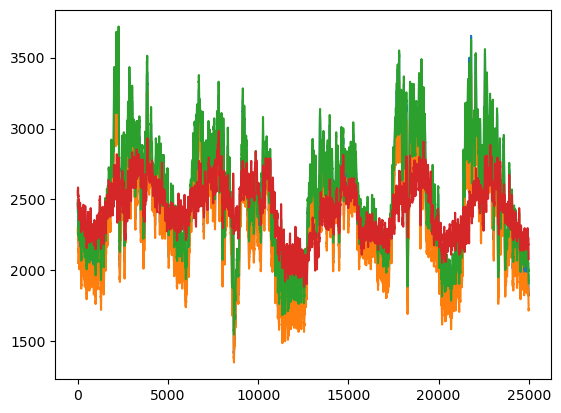

In [7]:
trace = recordings['raw'].get_traces(channel_ids=[93,94,95, 90], start_frame=5000, end_frame=5000+2500*10)
plt.figure()
plt.plot(trace[:,0])
plt.plot(trace[:,1])
plt.plot(trace[:,2])
plt.plot(trace[:,3])
plt.show()